In [240]:
from sympy import symbols, solve, Matrix, lambdify
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import pylab

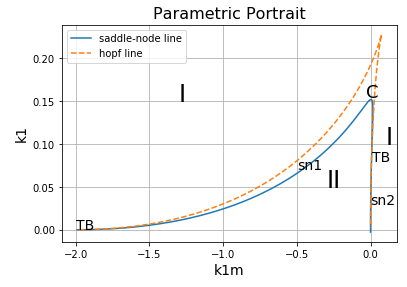

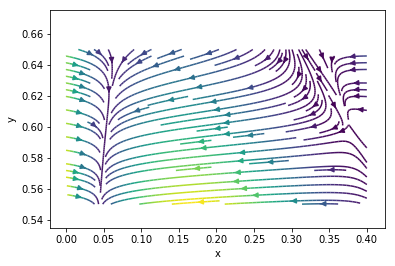

"\n# one-parameter analyse\nindex = 1\nwhile index < len(x_mas):\n    if trace_mas[index]*trace_mas[index-1] <= 0:\n        yh.append(y_mas[index])\n        xh.append(x_mas[index])\n        k1h.append(k2_mas[index])\n    if det_mas[index]*det_mas[index-1] <= 0:\n        ysn.append(y_mas[index])\n        xsn.append(x_mas[index])\n        k1sn.append(k2_mas[index])\n    index += 1\n\nfig = plt.figure()\nplt.plot(k2_mas, x_mas, label = u'x')\nplt.plot(k2_mas, y_mas, label = u'y', linestyle='--')\nplt.plot(k1h,yh, label = u'hopf(y(k2))', linestyle = 'None', marker='*', markersize = '15')\nplt.plot(k1sn,ysn, label = u'saddle-node(y(k2))', linestyle = 'None', marker='d')\nplt.plot(k1h,xh, label = u'hopf(x(k2))', linestyle = 'None', marker='*', markersize = '15', color='b')\nplt.plot(k1sn,xsn, label = u'saddle-node(x(k2))', linestyle = 'None', marker='d',color='m')\nplt.title('Dependence on Parameter k2, k3m = 0.004',fontsize=16)\nplt.ylabel('x,y',fontsize=14)\nplt.xlabel('k2',fontsize=14)\nx

In [312]:
cur_k1 = 1
cur_k1m = 0.01
cur_k3 = 0.0032
cur_k2 = 2
cur_k3m = 0.002

# variations of k1m
#cur_k1m = 0.001
#cur_k1m = 0.005
#cur_k1m = 0.01
#cur_k1m = 0.015
#cur_k1m = 0.02

# variations of k3m
#cur_k3m = 0.0005
#cur_k3m = 0.001
#cur_k3m = 0.002
#cur_k3m = 0.003
#cur_k3m = 0.004

k1, k1m, k3, k2, k3m, x, y = symbols("k1 k1m k3 k2 k3m x y")

eq1 = k1*(1-x-y)-k1m*x-k3*x+k3m*y-k2*x*(1-x-y)**2
eq2 = k3*x - k3m*y

res = solve([eq1,eq2],y,k2)
res1 = solve([eq1,eq2],y,k1)

y_res = res[0][0]
k2_res = res[0][1]
k1_res = res1[0][1]

A = Matrix([eq1,eq2])
var_vector = Matrix([x,y])
jacA = A.jacobian(var_vector)
trace_jacA = jacA.trace()
det_jacA = jacA.det()
#print(det_jacA)

y_mas = []
k2_mas = []
k1_mas = []
trace_mas = []
det_mas = []
yh = []
xh = []
k1h = []
ysn = []
xsn = []
k1sn = []
k1_mas_sn = []
k1_mas_hp = []
k1m_mas_sn = []
k1m_mas_hp = []

x_mas = [round(((i+1)+0.001)/1000,3) for i in range(384)]

Y_func = lambdify((x, k3, k3m), y_res)
K1_func = lambdify((x, k1m, k2, k3, k3m), k1_res)
K2_func = lambdify((x, k1m, k1, k3, k3m), k2_res)
trace_func = lambdify((x, y, k1m, k1, k2, k3, k3m), trace_jacA)
det_func = lambdify((x, y, k1m, k1, k2, k3, k3m), det_jacA)

#two-parametres analyse (k1m,k1)

res2 = solve([eq1,eq2],y,k1m)
k1m_res = res2[0][1]
trace_new = trace_jacA.subs(k1m,k1m_res)
det_new = det_jacA.subs(k1m,k1m_res)
result1_k1 = solve(trace_new,k1)
result2_k1 = solve(det_new,k1)
sn = lambdify((x, y, k2, k3, k3m),result1_k1)
hp = lambdify((x, y, k2, k3, k3m),result2_k1)
K1m_func = lambdify((x,k1,k2,k3,k3m),k1m_res,'numpy')

for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k1_mas_sn.append(sn(x_mas[m], y_mas[m], cur_k2, cur_k3, cur_k3m))
    k1_mas_hp.append(hp(x_mas[m], y_mas[m], cur_k2, cur_k3, cur_k3m))
    k1m_mas_sn.append(K1m_func(x_mas[m], k1_mas_sn[m], cur_k2, cur_k3, cur_k3m))
    k1m_mas_hp.append(K1m_func(x_mas[m], k1_mas_hp[m], cur_k2, cur_k3, cur_k3m))

fig = plt.figure()
plt.plot(k1m_mas_sn, k1_mas_sn, label = u'saddle-node line')
plt.plot(k1m_mas_hp, k1_mas_hp, label = u'hopf line', linestyle='--')
plt.title('Parametric Portrait',fontsize=16)
plt.ylabel('k1',fontsize=14)
plt.xlabel('k1m',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.grid(True)
arrowprops = {
    'arrowstyle': '->',
}
plt.annotate (u'Oscillation region',
                xy=(0.1, 0.25),
                xytext = (-0.7, 0.2),
                arrowprops = arrowprops)
plt.annotate (u'C',
                xy=(-0.03, 0.155),
                fontsize=18)
plt.annotate (u'TB',
                xy=(0.008, 0.08),
                fontsize=14)
plt.annotate (u'TB',
                xy=(-2.0, 0.0),
                fontsize=14)
plt.annotate (u'I',
                xy=(0.1, 0.1),fontsize=24)
plt.annotate (u'I',
                xy=(-1.3, 0.15),fontsize=24)
plt.annotate (u'sn2',
                xy=(0.0, 0.03),fontsize=14)
plt.annotate (u'sn1',
                xy=(-0.5, 0.07),fontsize=14)
plt.annotate (u'II',
                xy=(-0.3, 0.05),fontsize=24)
plt.show()

fig1 = plt.figure()
f1 = lambdify((x, y, k1, k1m, k2, k3, k3m), eq1)
f2 = lambdify((x, y, k3, k3m), eq2)
y_mesh, x_mesh = np.mgrid[0.55:0.65:1000j, 0.0:0.4:1000j]
#U = f1(x_mesh, y_mesh, 0.15013094420600845, 0.01 , cur_k2, cur_k3, cur_k3m) #h - область 1
#U = f1(x_mesh, y_mesh, 0.10082226236558917, 0.01 , cur_k2, cur_k3, cur_k3m) #sn - область 1
U = f1(x_mesh, y_mesh, 0.0336, 0.001 , cur_k2, cur_k3, cur_k3m) #sn - область 1

V = f2(x_mesh, y_mesh, cur_k3, cur_k3m)
velocity = np.sqrt(U*U + V*V)
plt.streamplot(x_mesh, y_mesh, U, V, density = [2.5, 0.8], color=velocity)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


'''
#dependence on k1
for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k1_mas.append(K1_func(x_mas[m], cur_k1m, cur_k2, cur_k3, cur_k3m))
    trace_mas.append(trace_func(x_mas[m], y_mas[m], cur_k1m, k1_mas[m], cur_k2, cur_k3, cur_k3m))
    det_mas.append(det_func(x_mas[m], y_mas[m], cur_k1m, k1_mas[m], cur_k2, cur_k3, cur_k3m))

'''
'''
#dependence on k2
for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k2_mas.append(K2_func(x_mas[m], cur_k1m, cur_k1, cur_k3, cur_k3m))
    trace_mas.append(trace_func(x_mas[m], y_mas[m], cur_k1m, cur_k1, k2_mas[m], cur_k3, cur_k3m))
    det_mas.append(det_func(x_mas[m], y_mas[m], cur_k1m, cur_k1, k2_mas[m], cur_k3, cur_k3m))
'''
'''
# one-parameter analyse
index = 1
while index < len(x_mas):
    if trace_mas[index]*trace_mas[index-1] <= 0:
        yh.append(y_mas[index])
        xh.append(x_mas[index])
        k1h.append(k2_mas[index])
    if det_mas[index]*det_mas[index-1] <= 0:
        ysn.append(y_mas[index])
        xsn.append(x_mas[index])
        k1sn.append(k2_mas[index])
    index += 1

fig = plt.figure()
plt.plot(k2_mas, x_mas, label = u'x')
plt.plot(k2_mas, y_mas, label = u'y', linestyle='--')
plt.plot(k1h,yh, label = u'hopf(y(k2))', linestyle = 'None', marker='*', markersize = '15')
plt.plot(k1sn,ysn, label = u'saddle-node(y(k2))', linestyle = 'None', marker='d')
plt.plot(k1h,xh, label = u'hopf(x(k2))', linestyle = 'None', marker='*', markersize = '15', color='b')
plt.plot(k1sn,xsn, label = u'saddle-node(x(k2))', linestyle = 'None', marker='d',color='m')
plt.title('Dependence on Parameter k2, k3m = 0.004',fontsize=16)
plt.ylabel('x,y',fontsize=14)
plt.xlabel('k2',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1))
plt.legend()
plt.grid(True)
plt.show()
'''

[0.1515321715142433, 0.03419552463768484]
[0.282, 0.374]
[0.45119999999999993, 0.5984]
[0.19269259462063418, 0.033630514285717866]
[0.193, 0.376]
[0.3088, 0.6016]


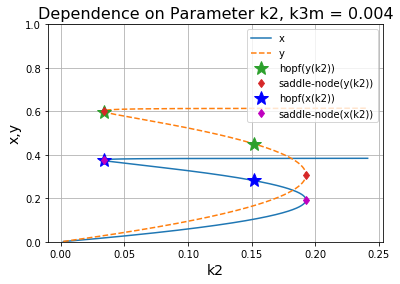

In [217]:
cur_k1 = 1
#cur_k1m = 0.01
cur_k3 = 0.0032
cur_k2 = 2
cur_k3m = 0.002

# variations of k1m
cur_k1m = 0.001
#cur_k1m = 0.005
#cur_k1m = 0.01
#cur_k1m = 0.015
#cur_k1m = 0.02

# variations of k3m
#cur_k3m = 0.0005
#cur_k3m = 0.001
#cur_k3m = 0.002
#cur_k3m = 0.003
#cur_k3m = 0.004

k1, k1m, k3, k2, k3m, x, y = symbols("k1 k1m k3 k2 k3m x y")

eq1 = k1*(1-x-y)-k1m*x-k3*x+k3m*y-k2*x*(1-x-y)**2
eq2 = k3*x - k3m*y

res = solve([eq1,eq2],y,k2)
res1 = solve([eq1,eq2],y,k1)

y_res = res[0][0]
k2_res = res[0][1]
k1_res = res1[0][1]

A = Matrix([eq1,eq2])
var_vector = Matrix([x,y])
jacA = A.jacobian(var_vector)
trace_jacA = jacA.trace()
det_jacA = jacA.det()
#print(det_jacA)

y_mas = []
k2_mas = []
k1_mas = []
trace_mas = []
det_mas = []
yh = []
xh = []
k1h = []
ysn = []
xsn = []
k1sn = []
k1_mas_sn = []
k1_mas_hp = []
k1m_mas_sn = []
k1m_mas_hp = []

x_mas = [round(((i+1)+0.001)/1000,3) for i in range(384)]

Y_func = lambdify((x, k3, k3m), y_res)
K1_func = lambdify((x, k1m, k2, k3, k3m), k1_res)
K2_func = lambdify((x, k1m, k1, k3, k3m), k2_res)
trace_func = lambdify((x, y, k1m, k1, k2, k3, k3m), trace_jacA)
det_func = lambdify((x, y, k1m, k1, k2, k3, k3m), det_jacA)



#dependence on k1
for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k1_mas.append(K1_func(x_mas[m], cur_k1m, cur_k2, cur_k3, cur_k3m))
    trace_mas.append(trace_func(x_mas[m], y_mas[m], cur_k1m, k1_mas[m], cur_k2, cur_k3, cur_k3m))
    det_mas.append(det_func(x_mas[m], y_mas[m], cur_k1m, k1_mas[m], cur_k2, cur_k3, cur_k3m))

'''
#dependence on k2
for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k2_mas.append(K2_func(x_mas[m], cur_k1m, cur_k1, cur_k3, cur_k3m))
    trace_mas.append(trace_func(x_mas[m], y_mas[m], cur_k1m, cur_k1, k2_mas[m], cur_k3, cur_k3m))
    det_mas.append(det_func(x_mas[m], y_mas[m], cur_k1m, cur_k1, k2_mas[m], cur_k3, cur_k3m))
'''
# one-parameter analyse
index = 1
while index < len(x_mas):
    if trace_mas[index]*trace_mas[index-1] <= 0:
        yh.append(y_mas[index])
        xh.append(x_mas[index])
        k1h.append(k1_mas[index])
    if det_mas[index]*det_mas[index-1] <= 0:
        ysn.append(y_mas[index])
        xsn.append(x_mas[index])
        k1sn.append(k1_mas[index])
    index += 1

print(k1h)
print(xh)
print(yh)
print(k1sn)
print(xsn)
print(ysn)

fig = plt.figure()
plt.plot(k1_mas, x_mas, label = u'x')
plt.plot(k1_mas, y_mas, label = u'y', linestyle='--')
plt.plot(k1h,yh, label = u'hopf(y(k2))', linestyle = 'None', marker='*', markersize = '15')
plt.plot(k1sn,ysn, label = u'saddle-node(y(k2))', linestyle = 'None', marker='d')
plt.plot(k1h,xh, label = u'hopf(x(k2))', linestyle = 'None', marker='*', markersize = '15', color='b')
plt.plot(k1sn,xsn, label = u'saddle-node(x(k2))', linestyle = 'None', marker='d',color='m')
plt.title('Dependence on Parameter k2, k3m = 0.004',fontsize=16)
plt.ylabel('x,y',fontsize=14)
plt.xlabel('k2',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1))
plt.legend()
plt.grid(True)
plt.show()


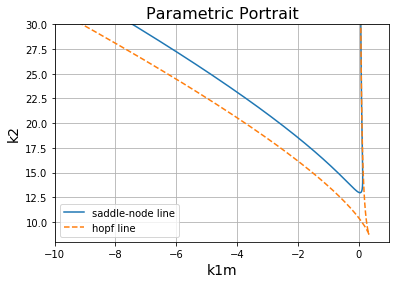

In [282]:
cur_k1 = 1
cur_k1m = 0.01
cur_k3 = 0.0032
cur_k2 = 2
cur_k3m = 0.002

# variations of k1m
#cur_k1m = 0.001
#cur_k1m = 0.005
#cur_k1m = 0.01
#cur_k1m = 0.015
#cur_k1m = 0.02

# variations of k3m
#cur_k3m = 0.0005
#cur_k3m = 0.001
#cur_k3m = 0.002
#cur_k3m = 0.003
#cur_k3m = 0.004

k1, k1m, k3, k2, k3m, x, y = symbols("k1 k1m k3 k2 k3m x y")

eq1 = k1*(1-x-y)-k1m*x-k3*x+k3m*y-k2*x*(1-x-y)**2
eq2 = k3*x - k3m*y

A = Matrix([eq1,eq2])
var_vector = Matrix([x,y])
jacA = A.jacobian(var_vector)
trace_jacA = jacA.trace()
det_jacA = jacA.det()
#print(det_jacA)

y_mas = []
trace_mas = []
det_mas = []
k2_mas_sn = []
k2_mas_hp = []
k1m_mas_sn = []
k1m_mas_hp = []

x_mas = [round(((i+1)+0.001)/1000,3) for i in range(384)]

Y_func = lambdify((x, k3, k3m), y_res)
trace_func = lambdify((x, y, k1m, k1, k2, k3, k3m), trace_jacA)
det_func = lambdify((x, y, k1m, k1, k2, k3, k3m), det_jacA)

#two-parametres analyse (k1m,k1)

res2 = solve([eq1,eq2],y,k1m)
k1m_res = res2[0][1]
trace_new = trace_jacA.subs(k1m,k1m_res)
det_new = det_jacA.subs(k1m,k1m_res)
result1_k2 = solve(trace_new,k2)
result2_k2 = solve(det_new,k2)
sn = lambdify((x, y, k1, k3, k3m),result1_k2)
hp = lambdify((x, y, k1, k3, k3m),result2_k2)
K1m_func = lambdify((x,k2,k1,k3,k3m),k1m_res)

for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k2_mas_sn.append(sn(x_mas[m], y_mas[m], cur_k1, cur_k3, cur_k3m))
    k2_mas_hp.append(hp(x_mas[m], y_mas[m], cur_k1, cur_k3, cur_k3m))

k2_array_sn = np.array(k2_mas_sn)
k2_array_hp = np.array(k2_mas_hp)

for m in range(len(x_mas)):
    k1m_mas_sn.append(K1m_func(x_mas[m], k2_array_sn[m], cur_k1, cur_k3, cur_k3m))
    k1m_mas_hp.append(K1m_func(x_mas[m], k2_array_hp[m], cur_k1, cur_k3, cur_k3m))
    
fig = plt.figure()
plt.plot(k1m_mas_sn, k2_mas_sn, label = u'saddle-node line')
plt.plot(k1m_mas_hp, k2_mas_hp, label = u'hopf line', linestyle='--')
plt.title('Parametric Portrait',fontsize=16)
plt.ylabel('k2',fontsize=14)
plt.xlabel('k1m',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((-10,1,8,30))
plt.legend()
plt.grid(True)

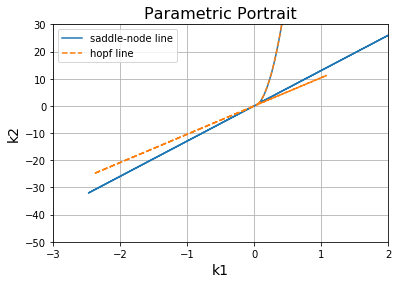

In [310]:
cur_k1 = 1
cur_k1m = 0.01
cur_k3 = 0.0032
cur_k2 = 2
cur_k3m = 0.002

# variations of k1m
#cur_k1m = 0.001
#cur_k1m = 0.005
#cur_k1m = 0.01
#cur_k1m = 0.015
#cur_k1m = 0.02

# variations of k3m
#cur_k3m = 0.0005
#cur_k3m = 0.001
#cur_k3m = 0.002
#cur_k3m = 0.003
#cur_k3m = 0.004

k1, k1m, k3, k2, k3m, x, y = symbols("k1 k1m k3 k2 k3m x y")

eq1 = k1*(1-x-y)-k1m*x-k3*x+k3m*y-k2*x*(1-x-y)**2
eq2 = k3*x - k3m*y

A = Matrix([eq1,eq2])
var_vector = Matrix([x,y])
jacA = A.jacobian(var_vector)
trace_jacA = jacA.trace()
det_jacA = jacA.det()
#print(det_jacA)

y_mas = []
trace_mas = []
det_mas = []
k2_mas_sn = []
k2_mas_hp = []
k1_mas_sn = []
k1_mas_hp = []

x_mas = [round(((i+1)+0.001)/1000,3) for i in range(384)]

Y_func = lambdify((x, k3, k3m), y_res)
trace_func = lambdify((x, y, k1m, k1, k2, k3, k3m), trace_jacA)
det_func = lambdify((x, y, k1m, k1, k2, k3, k3m), det_jacA)

#two-parametres analyse (k1m,k1)->(k1,k2) 

res2 = solve([eq1,eq2],y,k1)
k1_res = res2[0][1]
trace_new = trace_jacA.subs(k1,k1_res)
det_new = det_jacA.subs(k1,k1_res)
result1_k2 = solve(trace_new,k2)
result2_k2 = solve(det_new,k2)
sn = lambdify((x, y, k1m, k3, k3m),result1_k2)
hp = lambdify((x, y, k1m, k3, k3m),result2_k2)
K1_func = lambdify((x,k2,k1m,k3,k3m),k1_res)

for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k2_mas_sn.append(sn(x_mas[m], y_mas[m], cur_k1m, cur_k3, cur_k3m))
    k2_mas_hp.append(hp(x_mas[m], y_mas[m], cur_k1m, cur_k3, cur_k3m))

k2_array_sn = np.array(k2_mas_sn)
k2_array_hp = np.array(k2_mas_hp)

for m in range(len(x_mas)):
    k1_mas_sn.append(K1_func(x_mas[m], k2_array_sn[m], cur_k1m, cur_k3, cur_k3m))
    k1_mas_hp.append(K1_func(x_mas[m], k2_array_hp[m], cur_k1m, cur_k3, cur_k3m))


fig3 = plt.figure()
plt.plot(k1_mas_sn, k2_mas_sn, label = u'saddle-node line')
plt.plot(k1_mas_hp, k2_mas_hp, label = u'hopf line', linestyle='--')
plt.title('Parametric Portrait',fontsize=16)
plt.ylabel('k2',fontsize=14)
plt.xlabel('k1',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((-3,2,-50,30))
plt.legend()
plt.grid(True)


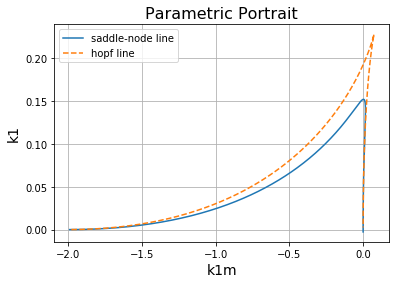

In [308]:
cur_k1 = 1
cur_k1m = 0.01
cur_k3 = 0.0032
cur_k2 = 2
cur_k3m = 0.002

# variations of k1m
#cur_k1m = 0.001
#cur_k1m = 0.005
#cur_k1m = 0.01
#cur_k1m = 0.015
#cur_k1m = 0.02

# variations of k3m
#cur_k3m = 0.0005
#cur_k3m = 0.001
#cur_k3m = 0.002
#cur_k3m = 0.003
#cur_k3m = 0.004

k1, k1m, k3, k2, k3m, x, y = symbols("k1 k1m k3 k2 k3m x y")

eq1 = k1*(1-x-y)-k1m*x-k3*x+k3m*y-k2*x*(1-x-y)**2
eq2 = k3*x - k3m*y

A = Matrix([eq1,eq2])
var_vector = Matrix([x,y])
jacA = A.jacobian(var_vector)
trace_jacA = jacA.trace()
det_jacA = jacA.det()
#print(det_jacA)

y_mas = []
trace_mas = []
det_mas = []
k1m_mas_sn = []
k1m_mas_hp = []
k1_mas_sn = []
k1_mas_hp = []

x_mas = [round(((i+1)+0.001)/1000,3) for i in range(384)]

Y_func = lambdify((x, k3, k3m), y_res)
trace_func = lambdify((x, y, k1m, k1, k2, k3, k3m), trace_jacA)
det_func = lambdify((x, y, k1m, k1, k2, k3, k3m), det_jacA)

#two-parametres analyse (k1m,k1)->(k1,k2) 

res2 = solve([eq1,eq2],y,k1m)
k1m_res = res2[0][1]
trace_new = trace_jacA.subs(k1m,k1m_res)
det_new = det_jacA.subs(k1m,k1m_res)
result1_k1 = solve(trace_new,k1)
result2_k1 = solve(det_new,k1)
sn = lambdify((x, y, k2, k3, k3m),result1_k1)
hp = lambdify((x, y, k2, k3, k3m),result2_k1)
K1m_func = lambdify((x,k1,k2,k3,k3m),k1m_res)

for m in range(len(x_mas)):
    y_mas.append(Y_func(x_mas[m], cur_k3, cur_k3m))
    k1_mas_sn.append(sn(x_mas[m], y_mas[m], cur_k2, cur_k3, cur_k3m))
    k1_mas_hp.append(hp(x_mas[m], y_mas[m], cur_k2, cur_k3, cur_k3m))

k1_array_sn = np.array(k1_mas_sn)
k1_array_hp = np.array(k1_mas_hp)

for m in range(len(x_mas)):
    k1m_mas_sn.append(K1m_func(x_mas[m], k1_array_sn[m], cur_k2, cur_k3, cur_k3m))
    k1m_mas_hp.append(K1m_func(x_mas[m], k1_array_hp[m], cur_k2, cur_k3, cur_k3m))


fig3 = plt.figure()
plt.plot(k1m_mas_sn, k1_mas_sn, label = u'saddle-node line')
plt.plot(k1m_mas_hp, k1_mas_hp, label = u'hopf line', linestyle='--')
plt.title('Parametric Portrait',fontsize=16)
plt.ylabel('k1',fontsize=14)
plt.xlabel('k1m',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.grid(True)

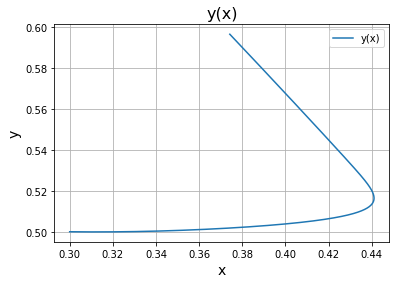

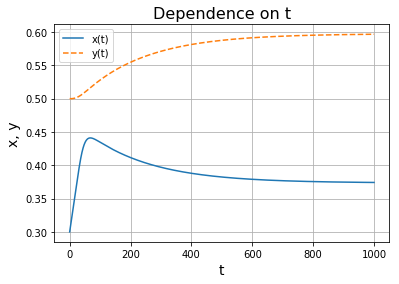

In [326]:
from scipy.integrate import odeint

def model(z,t,k1,k1m,k2,k3,k3m):
    x = z[0]
    y = z[1]
    dxdt = k1*(1-x-y)-k1m*x-k3*x+k3m*y-k2*((1-x-y)**2)*x
    dydt = k3*x-k3m*y
    dzdt = [dxdt,dydt]
    return dzdt

k1m = 0.01 
k1 = 0.1501 
k3 = 0.0032
k2 = 2
k3m= 0.002
# x_hp=0.295;  y_hp=0.472
#z = [0,0]
#z = [0.255, 0.432]  
z = [0.3, 0.5]
t = np.linspace(0,1000,1000000)   
# max step 1000000         
res = odeint(model, z, t, args = (k1,k1m,k2,k3,k3m))
xxx = []
yyy = []
for i in range(len(res)):
    xxx.append(res[i][0])
    yyy.append(res[i][1])
    
fig1 = plt.figure()
plt.plot(xxx, yyy, label = u'y(x)')
plt.title('y(x)',fontsize=16)
plt.ylabel('y',fontsize=14)
plt.xlabel('x',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
plt.plot(t, xxx, label = u'x(t)')
plt.plot(t, yyy, label = u'y(t)', linestyle='--')
plt.title('Dependence on t',fontsize=16)
plt.ylabel('x, y',fontsize=14)
plt.xlabel('t',fontsize=14)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.grid(True)
plt.show()